# k -medoids and c-means
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.
## Exercise 1
Use the s3.txt dataset from the previous lab.
- Run your k-means code 20 times with k = 15. Save the minimum, maximum and average values of the loss.
- Modify your code such that it uses the k-means++ initialization. Perform the same experiment of point 1 and compare the obtained values.
- Build a scree plot by plotting the best (ie. the lowest) loss out of 20 runs for k = 2, . . . , 20 (with k-means++). What is the optimal value of k?
- Modify your code to perform k-medoids. Repeat the assignment of point 3 with the new implementation.
- Modify your code to perform c-means. Repeat the assignment of point 3 with the new implementation.

In [1]:
import numpy as np
from unsupervised_learning.clustering import KMeans, KMedoids, FuzzyCMeans
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('Unsupervised_Learning_2024/Datasets/s3.txt')
#data = (data-data.mean())/data.std()
kmeans_losses = []
for i in range(20):
  kmeans = KMeans(15, 'random')
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
print(f"Best: {min(kmeans_losses):e}")
print(f"Worst: {max(kmeans_losses):e}")
print(f"Average: {sum(kmeans_losses)/20:e}")

ValueError: Input X contains NaN.
NearestNeighbors does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [3]:
kmeans_losses = []
for i in range(20):
  kmeans = KMeans(15, 'kmeans++')
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
print(f"Best: {min(kmeans_losses):e}")
print(f"Worst: {max(kmeans_losses):e}")
print(f"Average: {sum(kmeans_losses)/20:e}")

Best: 1.688985e+13
Worst: 2.132450e+13
Average: 1.900315e+13


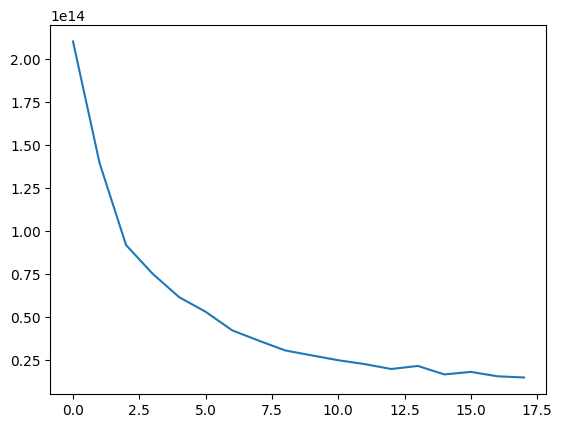

In [4]:
kmeans_losses = []
for i in range(2, 20):
  kmeans = KMeans(i, 'kmeans++')
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
plt.plot(kmeans_losses)
plt.show()


In [5]:
kmeans_losses = []
for i in range(20):
  kmeans = KMedoids(15, 'kmeans++', max_iter=30)
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
print(f"Best: {min(kmeans_losses):e}")
print(f"Worst: {max(kmeans_losses):e}")
print(f"Average: {sum(kmeans_losses)/20:e}")

Best: 1.806239e+13
Worst: 3.241559e+13
Average: 2.319794e+13


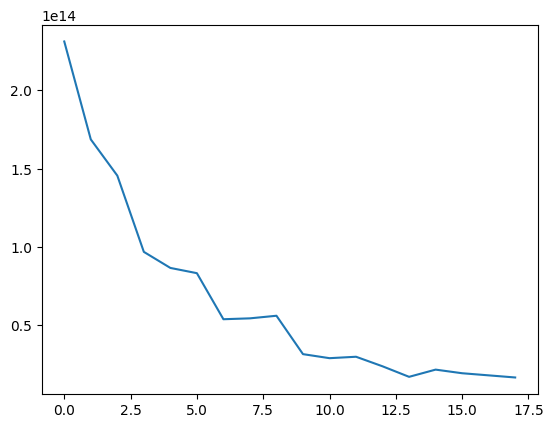

In [6]:
kmeans_losses = []
for i in range(2, 20):
  kmeans = KMedoids(i, 'kmeans++', max_iter=30)
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
plt.plot(kmeans_losses)
plt.show()

In [7]:
kmeans_losses = []
for i in range(20):
  kmeans = FuzzyCMeans(15, init='kmeans++')
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
print(f"Best: {min(kmeans_losses):e}")
print(f"Worst: {max(kmeans_losses):e}")
print(f"Average: {sum(kmeans_losses)/20:e}")

Best: 7.128597e+09
Worst: 7.128597e+09
Average: 7.128597e+09


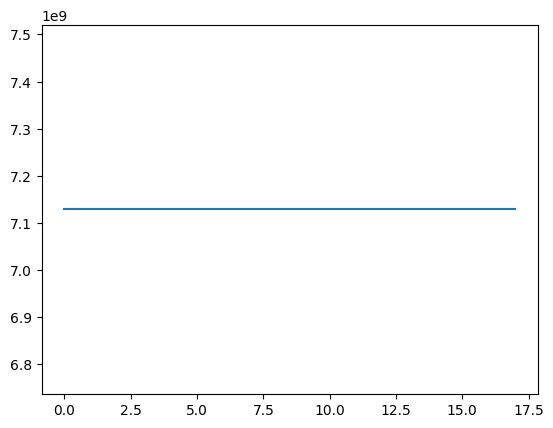

[7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002, 7128597002]


In [5]:
kmeans_losses = []
for i in range(2, 20):
  kmeans = FuzzyCMeans(i, 2)
  _ = kmeans.fit_predict(data)
  kmeans_losses.append(int(kmeans.loss))
plt.plot(kmeans_losses)
plt.show()
print(kmeans_losses)